In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score


In [2]:
# Load data 
df = pd.read_csv("daily_data.csv")


In [3]:
#view data
df

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
2664,72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
2665,72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08
2666,72518014735,2022-05-30T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0,2006-09-08


In [4]:
#Information of Dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10  DailyAverage

In [5]:
# Basic statistics
print(df.describe())

            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std                          19.116250          

In [7]:
# df = df.astype(float, errors='ignore')
df = df.apply(pd.to_numeric, errors='coerce')

<Axes: >

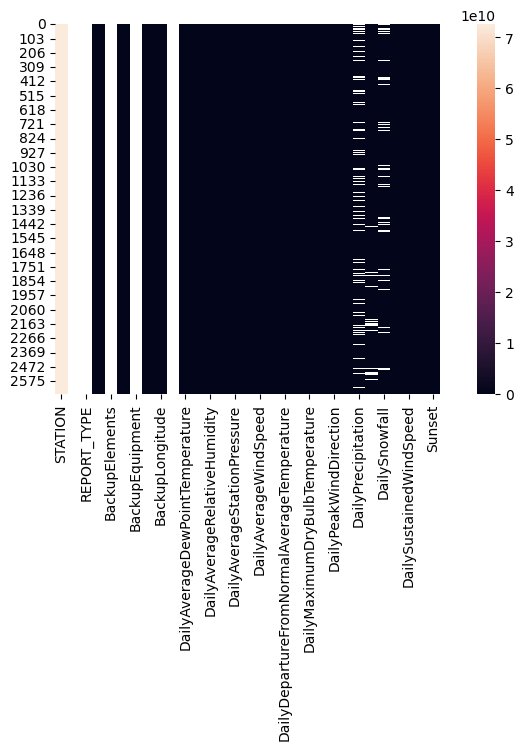

In [8]:
sns.heatmap(df)

In [9]:
# ax = sns.heatmap(data)
df.dropna(how='all')


,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,NaN,NaN,6,NaN,260,NaN,42.6918,-73.83109,NaN,...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,NaN
1,72518014735,NaN,NaN,6,NaN,260,NaN,42.6918,-73.83109,NaN,...,250.0,30.0,NaN,0.0,NaN,310.0,23.0,726.0,1633.0,NaN
2,72518014735,NaN,NaN,6,NaN,260,NaN,42.6918,-73.83109,NaN,...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,NaN
3,72518014735,NaN,NaN,6,NaN,260,NaN,42.6918,-73.83109,NaN,...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,NaN
4,72518014735,NaN,NaN,6,NaN,260,NaN,42.6918,-73.83109,NaN,...,280.0,42.0,NaN,0.0,NaN,290.0,32.0,726.0,1636.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,72518014735,NaN,NaN,6,NaN,260,NaN,42.6812,-73.81650,NaN,...,160.0,28.0,0.00,0.0,0.0,160.0,21.0,423.0,1922.0,NaN
2664,72518014735,NaN,NaN,6,NaN,260,NaN,42.6812,-73.81650,NaN,...,310.0,26.0,0.04,0.0,0.0,310.0,22.0,422.0,1923.0,NaN
2665,72518014735,NaN,NaN,6,NaN,260,NaN,42.6812,-73.81650,NaN,...,90.0,13.0,0.00,0.0,0.0,180.0,9.0,421.0,1924.0,NaN
2666,72518014735,NaN,NaN,6,NaN,260,NaN,42.6812,-73.81650,NaN,...,200.0,15.0,0.00,0.0,0.0,190.0,12.0,421.0,1925.0,NaN


In [10]:
# Load the daily dataset
df = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
# Create a new column for the month
df['Month'] = df['DATE'].dt.month

# Calculate average temperature and precipitation per month
monthly_aggregations = df.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})

# Display monthly aggregations
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [12]:
# Load the daily dataset
df = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
# Create a new column for the month
df['Month'] = df['DATE'].dt.month

# Calculate average temperature and precipitation per month
monthly_aggregations = df.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})

# Display monthly aggregations
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [13]:
average_daily_temperature = df.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print("Average Daily Temperature:")
print(average_daily_temperature)

Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [14]:
# Identify days with extreme temperatures (e.g., above 90°F)
extreme_temperature_days = df[df['DailyMaximumDryBulbTemperature'] > 90]

# Display information about extreme temperature days
print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


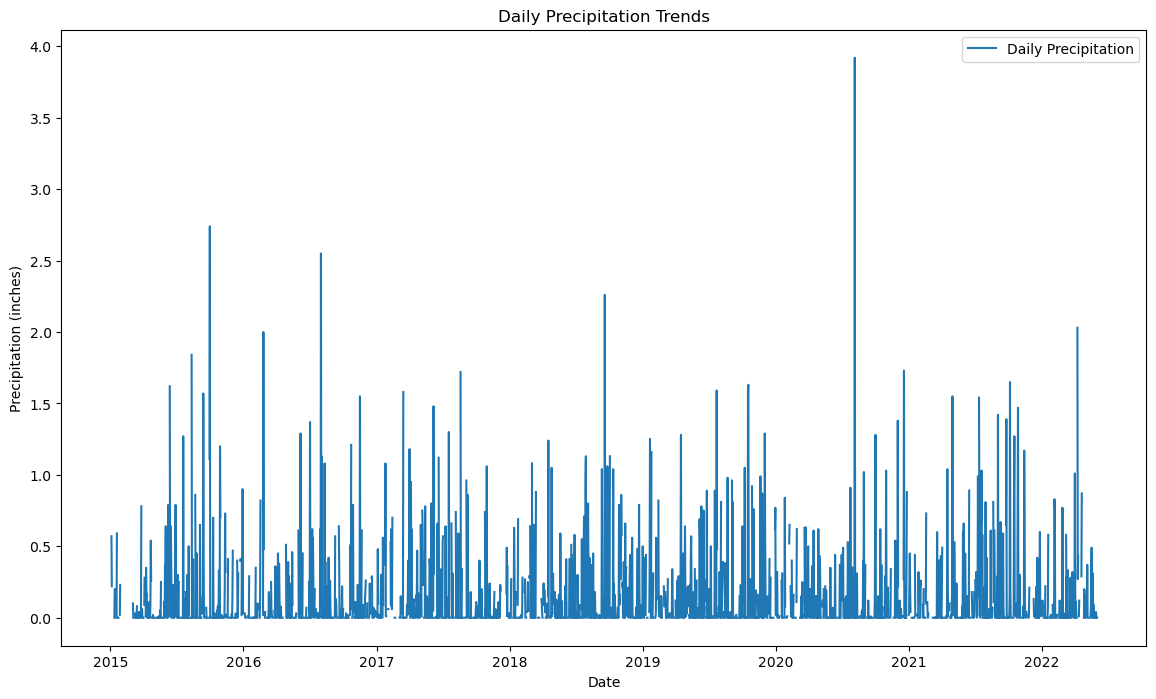

In [15]:
# Visualize precipitation over time
plt.figure(figsize=(14, 8))
plt.plot(df['DATE'], df['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

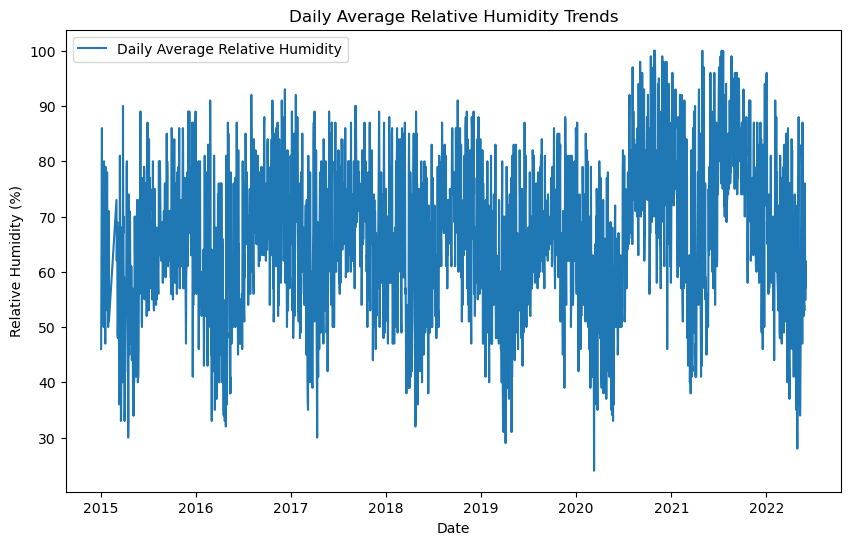

In [16]:
# Visualize humidity over time
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()




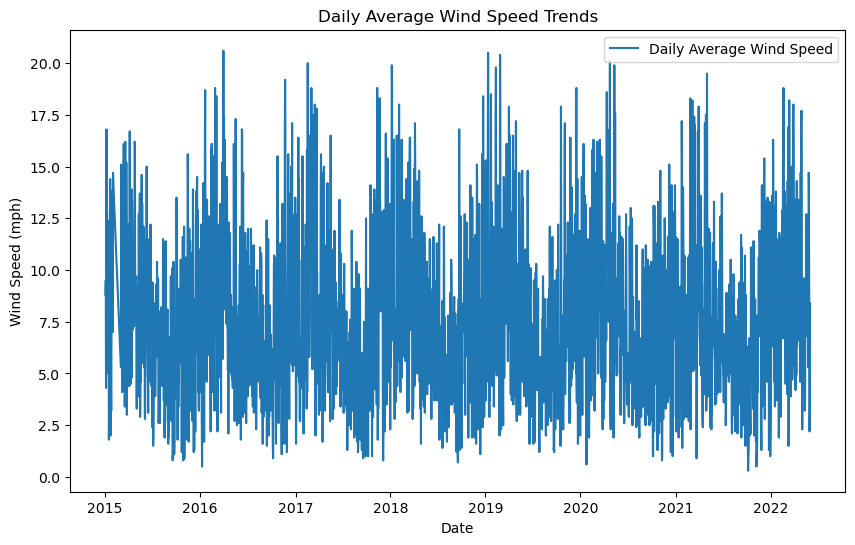

In [17]:
# Visualize wind speed over time
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()


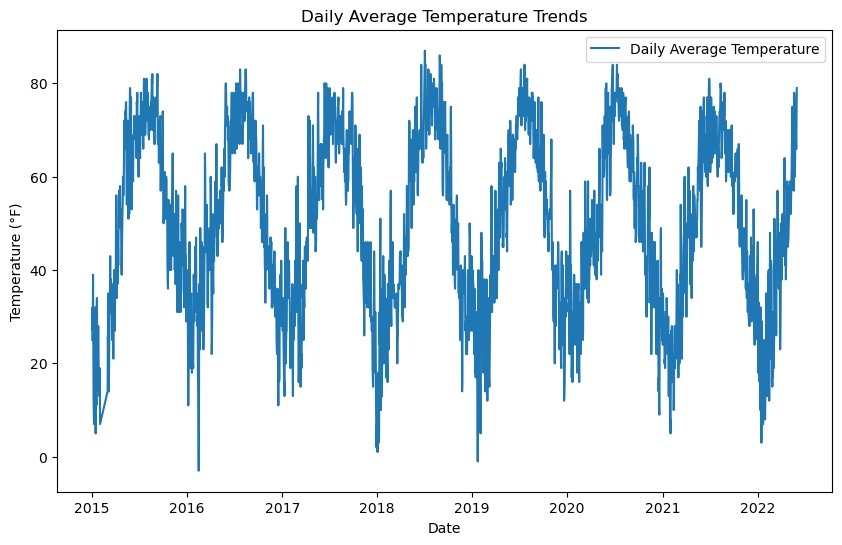

In [18]:
# Visualize trends over time
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


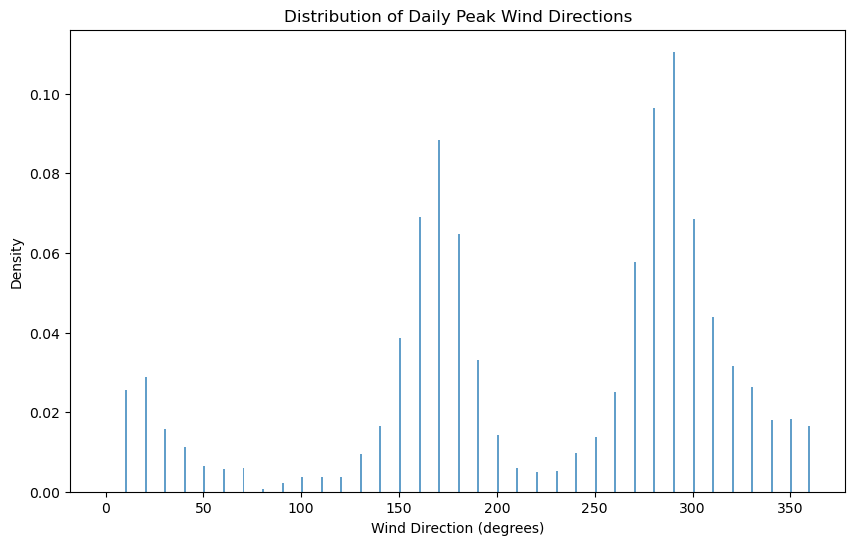

In [19]:
# Visualize distribution of wind directions
plt.figure(figsize=(10, 6))
plt.hist(df['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()


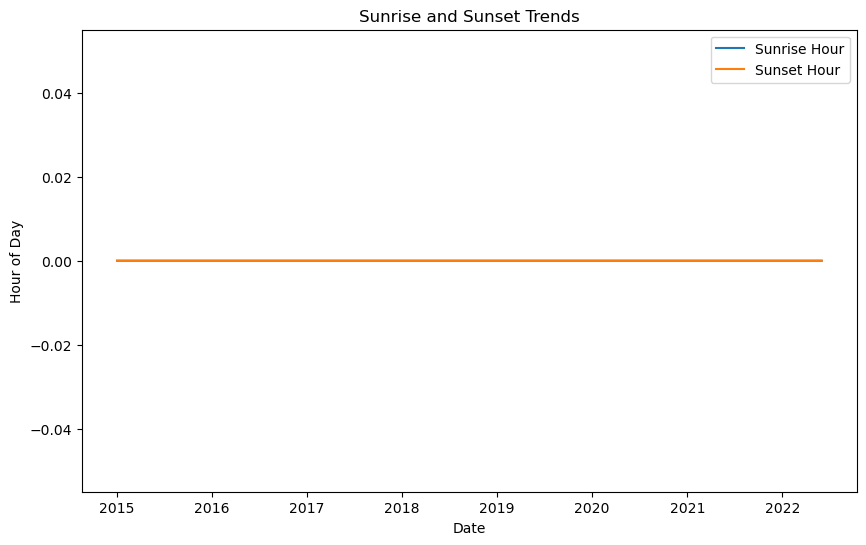

In [20]:
# Convert 'Sunrise' and 'Sunset' columns to datetime format
df['Sunrise'] = pd.to_datetime(df['Sunrise'], errors='coerce')
df['Sunset'] = pd.to_datetime(df['Sunset'], errors='coerce')

# Extract hour from sunrise and sunset times
df['Sunrise_Hour'] = df['Sunrise'].dt.hour
df['Sunset_Hour'] = df['Sunset'].dt.hour

# Visualize trends in sunrise and sunset times
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['Sunrise_Hour'], label='Sunrise Hour')
plt.plot(df['DATE'], df['Sunset_Hour'], label='Sunset Hour')
plt.title('Sunrise and Sunset Trends')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

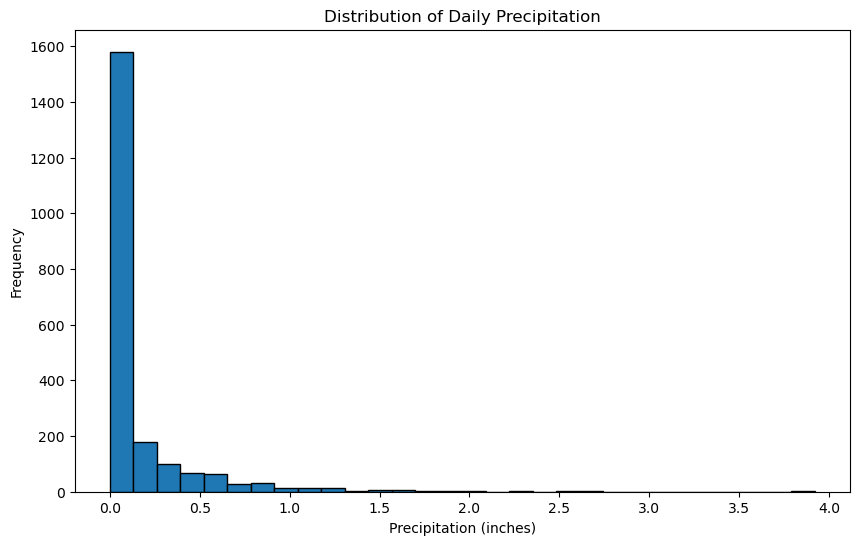

In [21]:
# Visualize the distribution of daily precipitation
plt.figure(figsize=(10,6))
plt.hist(df['DailyPrecipitation'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

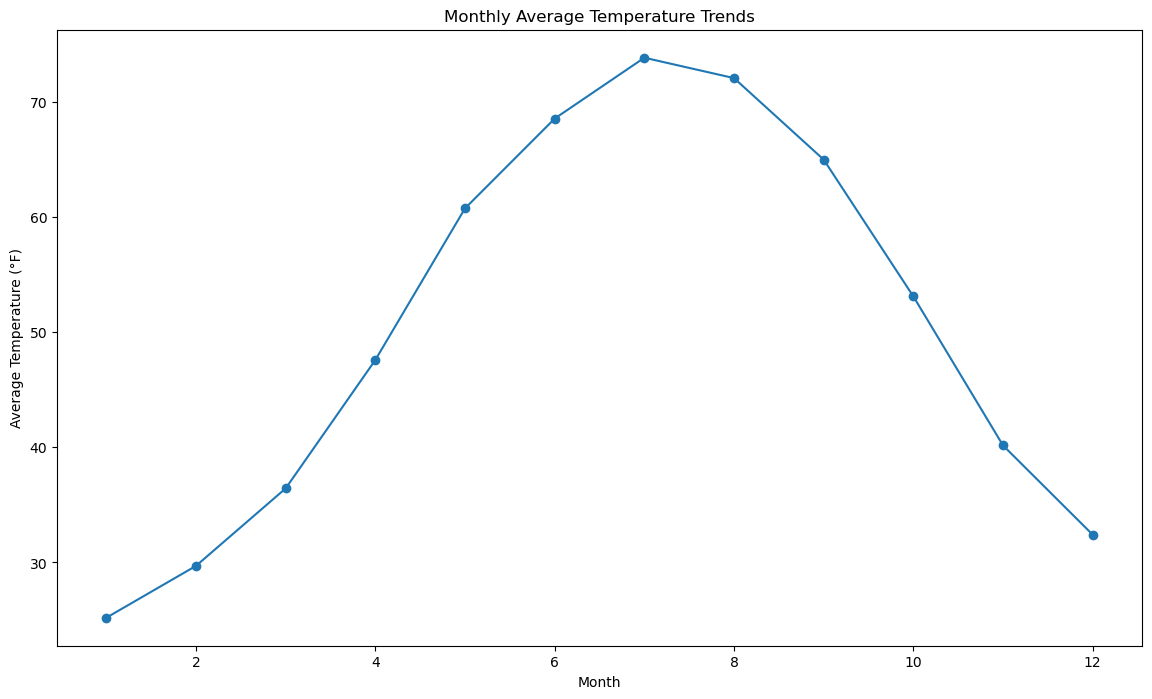

In [22]:
# Create a new column for the month
df['Month'] = df['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = df.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in monthly average temperature
plt.figure(figsize=(14, 8))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

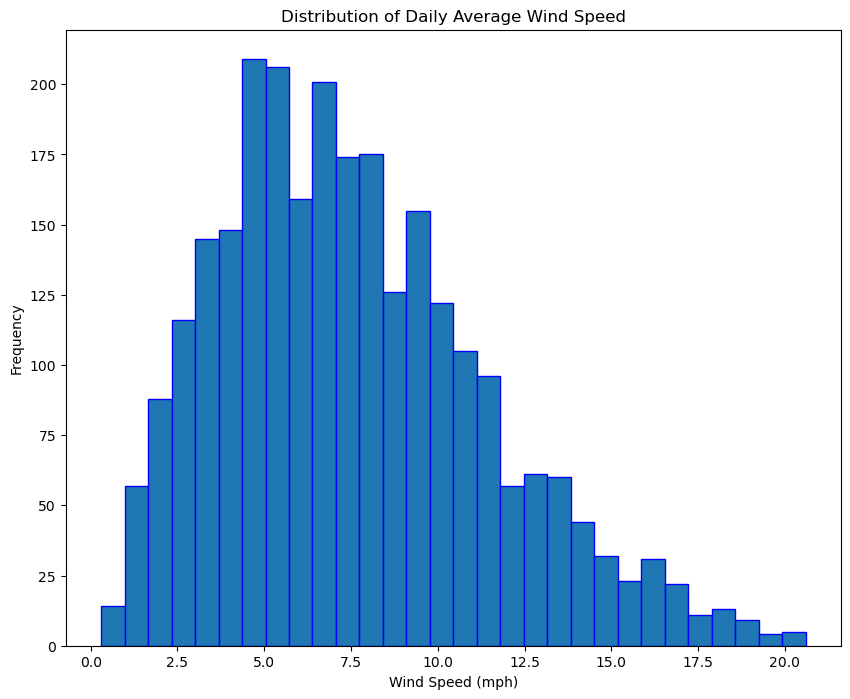

In [23]:
# Visualize the distribution of daily average wind speed
plt.figure(figsize=(10, 8))
plt.hist(df['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='blue')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()


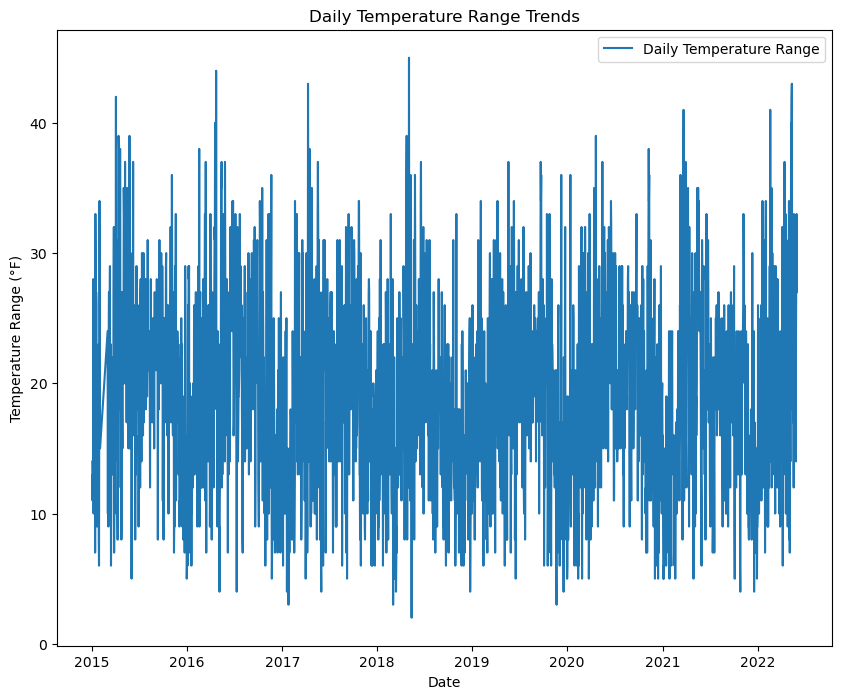

In [24]:
# Calculate daily temperature range
df['TemperatureRange'] = df['DailyMaximumDryBulbTemperature'] - df['DailyMinimumDryBulbTemperature']

# Visualize trends in daily temperature range
plt.figure(figsize=(10, 8))
plt.plot(df['DATE'], df['TemperatureRange'], label='Daily Temperature Range')
plt.title('Daily Temperature Range Trends')
plt.xlabel('Date')
plt.ylabel('Temperature Range (°F)')
plt.legend()
plt.show()

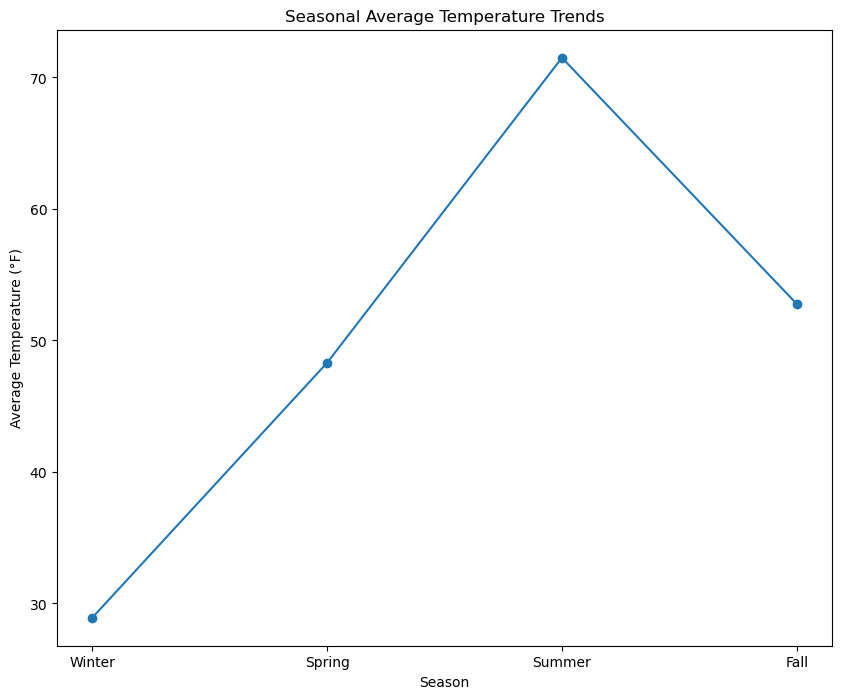

In [25]:
# Extract the season from the date (e.g., Winter, Spring, Summer, Fall)
df['Season'] = (df['DATE'].dt.month % 12 + 3) // 3

# Calculate average temperature per season
seasonal_temperature = df.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in seasonal average temperature
plt.figure(figsize=(10, 8))
plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()


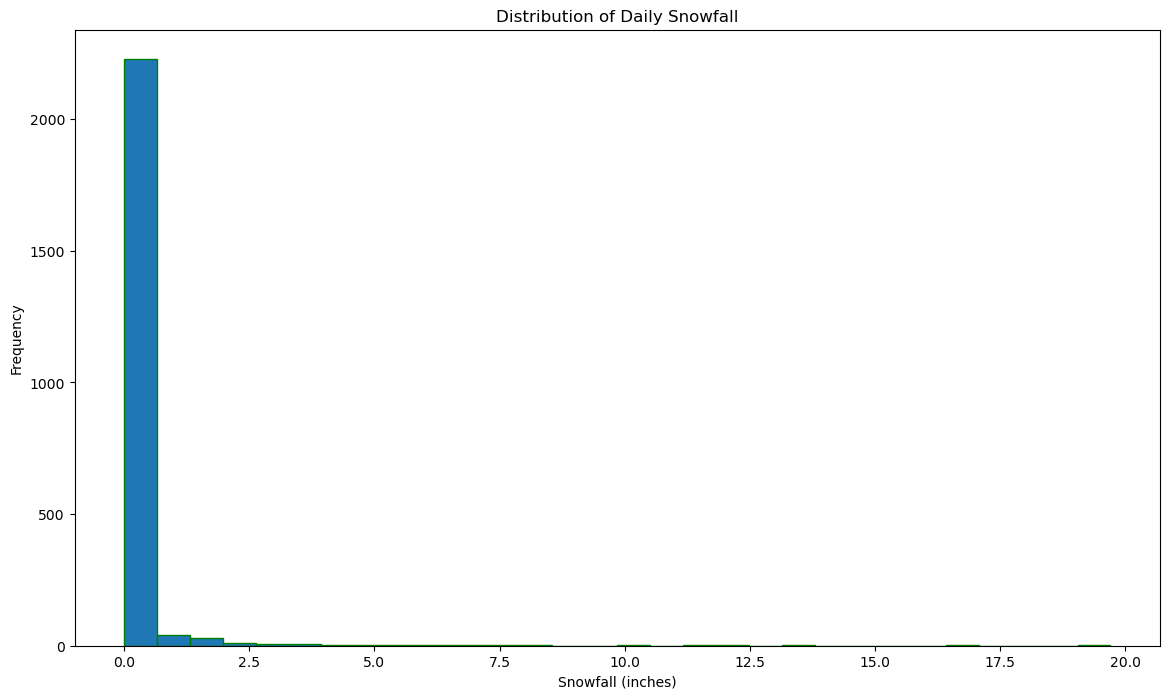

In [26]:
# Visualize the distribution of daily snowfall
plt.figure(figsize=(14, 8))
plt.hist(df['DailySnowfall'].dropna(), bins=30, edgecolor='green')
plt.title('Distribution of Daily Snowfall')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()


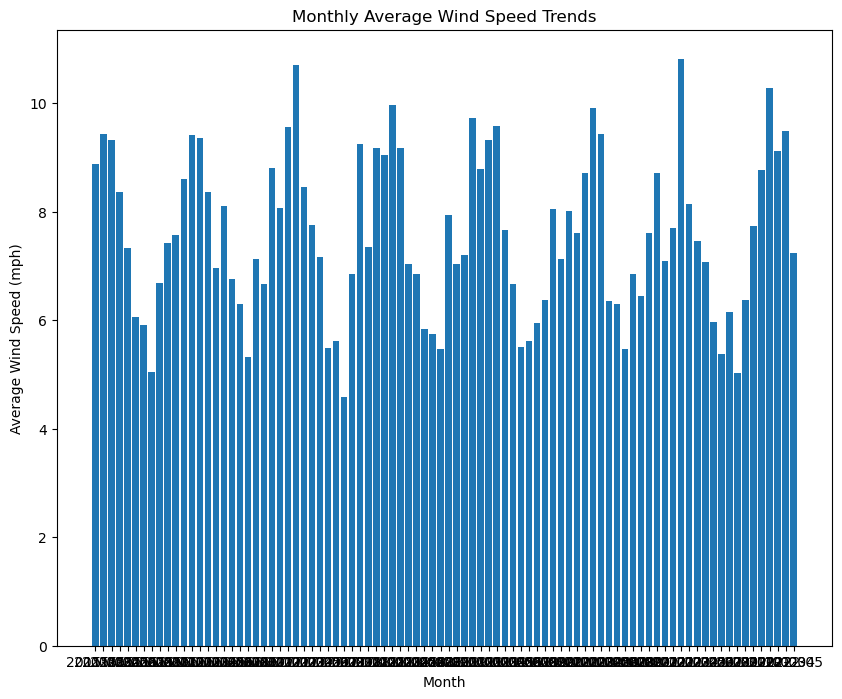

In [27]:
# Calculate average monthly wind speed
monthly_wind_speed = df.groupby(df['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

# Visualize trends in monthly average wind speed
plt.figure(figsize=(10, 8))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()


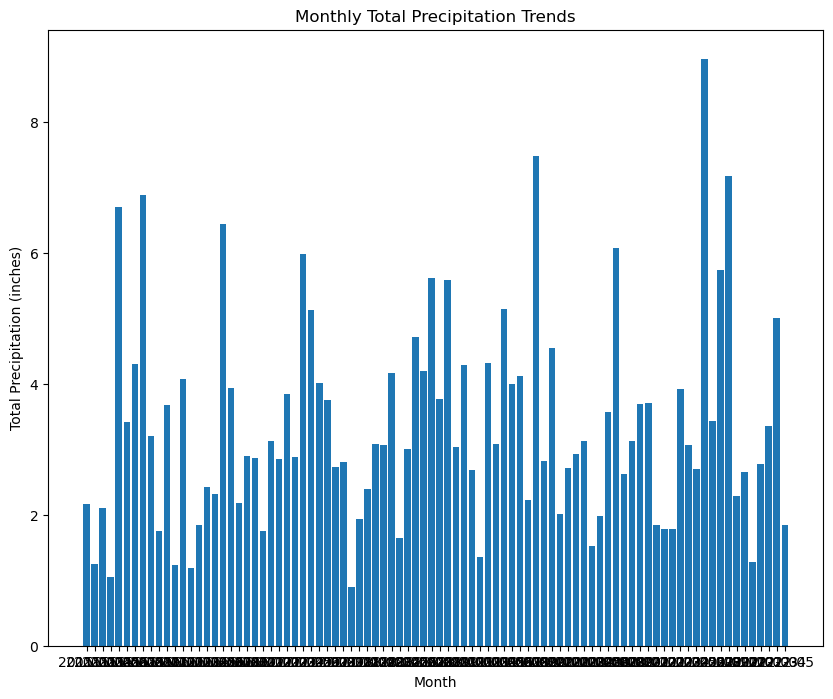

In [28]:
# Calculate total monthly precipitation
monthly_precipitation = df.groupby(df['DATE'].dt.to_period("M"))['DailyPrecipitation'].sum()

# Visualize trends in monthly precipitation
plt.figure(figsize=(10, 8))
plt.bar(monthly_precipitation.index.astype(str), monthly_precipitation.values)
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.show()


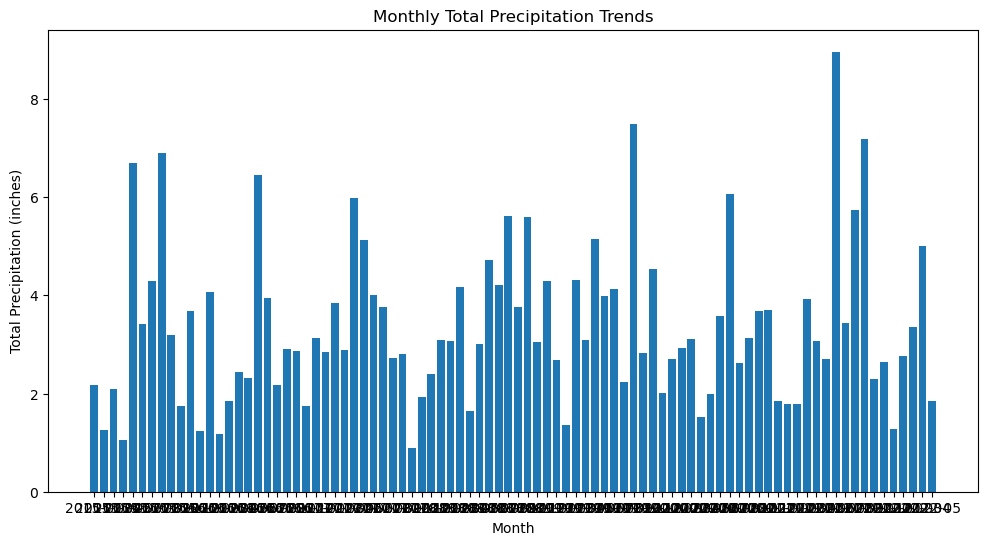

In [29]:
# Calculate total monthly precipitation
monthly_precipitation = df.groupby(df['DATE'].dt.to_period("M"))['DailyPrecipitation'].sum()

# Visualize trends in monthly precipitation
plt.figure(figsize=(12, 6))
plt.bar(monthly_precipitation.index.astype(str), monthly_precipitation.values)
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.show()


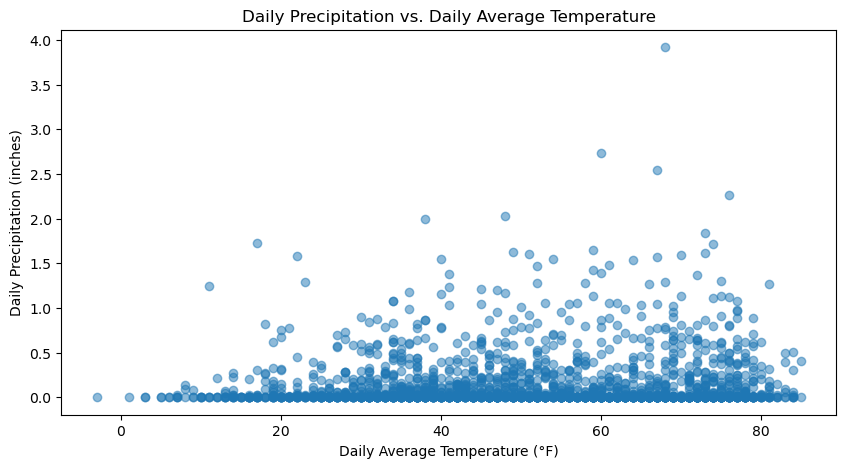

In [30]:
# Scatter plot of daily precipitation vs. daily average temperature
plt.figure(figsize=(10, 5))
plt.scatter(df['DailyAverageDryBulbTemperature'], df['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()


In [31]:
df1=pd.read_csv("monthly_data.csv")

In [32]:
df1

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.9,PRECIP,260,PLASTIC,42.6918,-73.83109,...,19.7,29.32,24.0,1707.0,10.5,30.11,29.77,2.17,1316.0,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6918,-73.83109,...,12.7,29.56,15.0,151.0,2.4,30.09,29.75,2.15,1093.0,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,29.8,29.56,17.0,1251.0,20.7,30.10,29.76,1.25,929.0,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.4,PRECIP,260,PLASTIC,42.6918,-73.83109,...,47.8,29.54,21.0,451.0,36.9,29.98,29.66,2.10,520.0,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.3,PRECIP,260,PLASTIC,42.6918,-73.83109,...,65.6,29.71,12.0,1251.0,52.8,30.09,29.77,1.05,235.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72518014735,2022-01-31T23:59:00,SOM,6,8.7,PRECIP,260,PLASTIC,42.6812,-73.81650,...,19.7,28.98,17.0,1351.0,10.5,30.08,29.75,1.28,1316.0,2006-09-08
83,72518014735,2022-02-28T23:59:00,SOM,6,10.3,PRECIP,260,PLASTIC,42.6812,-73.81650,...,27.5,29.16,18.0,451.0,17.3,30.17,29.85,2.77,1093.0,2006-09-08
84,72518014735,2022-03-31T23:59:00,SOM,6,9.2,PRECIP,260,PLASTIC,42.6812,-73.81650,...,37.3,29.34,7.0,1951.0,27.4,29.98,29.33,3.35,929.0,2006-09-08
85,72518014735,2022-04-30T23:59:00,SOM,6,9.6,PRECIP,260,PLASTIC,42.6812,-73.81650,...,47.8,29.49,1.0,151.0,37.3,29.98,29.66,5.00,520.0,2006-09-08


In [33]:
print(df1)

        STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0   72518014735  2015-01-31T23:59:00       SOM         6   8.9         PRECIP   
1   72518014735  2015-02-28T23:59:00       SOM         6   8.7         PRECIP   
2   72518014735  2015-03-31T23:59:00       SOM         6   9.4         PRECIP   
3   72518014735  2015-04-30T23:59:00       SOM         6   9.4         PRECIP   
4   72518014735  2015-05-31T23:59:00       SOM         6   8.3         PRECIP   
..          ...                  ...         ...     ...   ...            ...   
82  72518014735  2022-01-31T23:59:00       SOM         6   8.7         PRECIP   
83  72518014735  2022-02-28T23:59:00       SOM         6  10.3         PRECIP   
84  72518014735  2022-03-31T23:59:00       SOM         6   9.2         PRECIP   
85  72518014735  2022-04-30T23:59:00       SOM         6   9.6         PRECIP   
86  72518014735  2022-05-31T23:59:00       SOM         6   7.2         PRECIP   

    BackupElevation BackupE

In [34]:
df1.describe()

,STATION,SOURCE,AWND,BackupElevation,BackupLatitude,BackupLongitude,CDSD,CLDD,DSNW,HDSD,...,MonthlyMaximumTemperature,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay
count,8.700000e+01,87.0,87.000000,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,...,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,7.251801e+10,6.0,7.596552,260.0,42.689729,-73.828239,362.954023,60.252874,1.149425,3129.402299,...,58.793103,49.234483,29.437701,15.620690,1242.494253,39.671264,30.031149,29.691264,3.377586,573.781609
std,0.000000e+00,0.0,1.458930,0.0,0.004227,0.005819,367.436180,92.905706,1.660266,2504.767930,...,18.297673,17.363701,0.202672,8.977027,618.884722,16.514024,0.076088,0.136840,1.602071,459.629563
min,7.251801e+10,6.0,4.700000,260.0,42.681200,-73.831090,0.000000,0.000000,0.000000,0.000000,...,23.000000,12.700000,28.820000,1.000000,51.000000,2.400000,29.860000,28.860000,0.900000,5.000000
25%,7.251801e+10,6.0,6.500000,260.0,42.691800,-73.831090,0.000000,0.000000,0.000000,421.500000,...,41.200000,32.900000,29.335000,7.500000,701.000000,24.350000,29.975000,29.655000,2.205000,144.000000
50%,7.251801e+10,6.0,7.400000,260.0,42.691800,-73.831090,210.000000,0.000000,0.000000,3403.000000,...,58.700000,48.900000,29.440000,15.000000,1414.000000,39.500000,30.030000,29.700000,3.070000,520.000000
75%,7.251801e+10,6.0,8.700000,260.0,42.691800,-73.831090,741.000000,114.000000,2.000000,5567.000000,...,76.550000,66.450000,29.585000,23.500000,1707.500000,55.550000,30.090000,29.770000,4.095000,1093.000000
max,7.251801e+10,6.0,10.700000,260.0,42.691800,-73.816500,1026.000000,357.000000,5.000000,6913.000000,...,87.400000,76.500000,29.750000,31.000000,2351.000000,66.500000,30.210000,29.880000,8.960000,1316.000000


In [36]:
# Convert the 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])


In [39]:
# Check the date range of the dataset
print("Start Date:", df['DATE'].min())
print("End Date:", df['DATE'].max())

Start Date: 2015-01-01 23:59:00
End Date: 2022-05-31 23:59:00


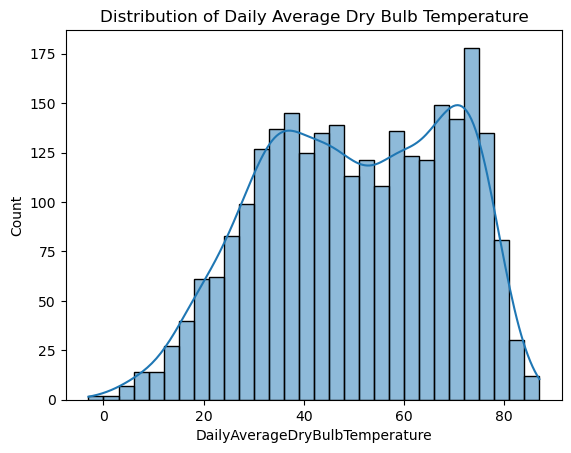

In [40]:
# Visualize the distribution of some key columns
sns.histplot(df['DailyAverageDryBulbTemperature'], bins=30, kde=True)
plt.title('Distribution of Daily Average Dry Bulb Temperature')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_9936\2807874251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


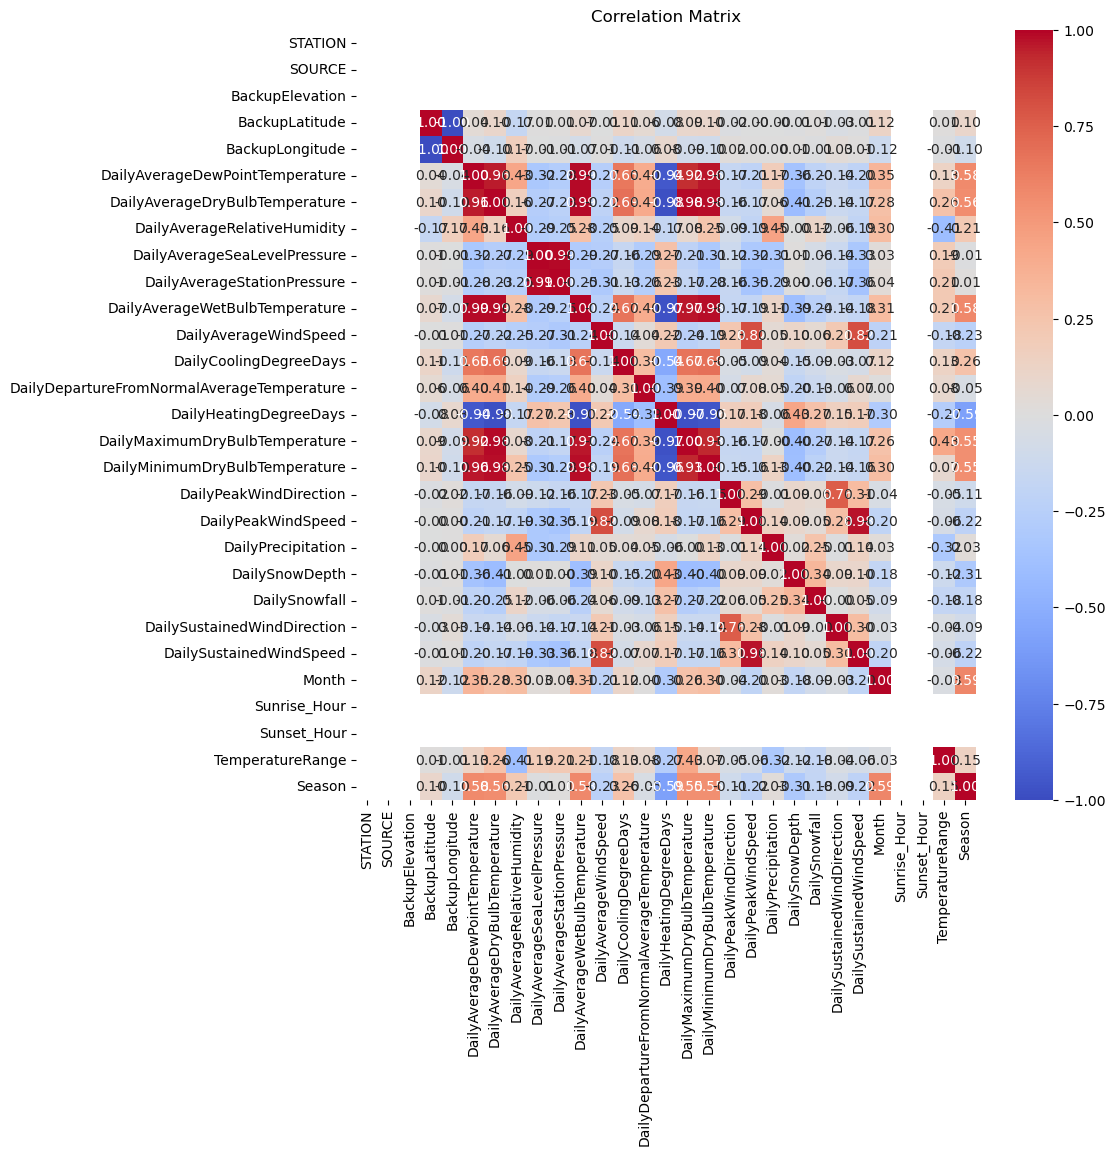

In [41]:
# Check the correlation between numerical columns
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [42]:
print(df['REPORT_TYPE'].value_counts())

SOD      2668
Name: REPORT_TYPE, dtype: int64


In [34]:
# Reading the csv file
df1 = pd.read_csv("monthly_data.csv")
df1


,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,...,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,NormalsHeatingDegreeDay,WindEquipmentChangeDate
0,72518014735,2015-01-31T23:59:00,SOM,6,8.90,PRECIP,260,PLASTIC,42.69,-73.83,...,19.70,29.32,24.00,1707.00,10.50,30.11,29.77,2.17,1316.00,2006-09-08
1,72518014735,2015-02-28T23:59:00,SOM,6,8.70,PRECIP,260,PLASTIC,42.69,-73.83,...,12.70,29.56,15.00,151.00,2.40,30.09,29.75,2.15,1093.00,2006-09-08
2,72518014735,2015-03-31T23:59:00,SOM,6,9.40,PRECIP,260,PLASTIC,42.69,-73.83,...,29.80,29.56,17.00,1251.00,20.70,30.10,29.76,1.25,929.00,2006-09-08
3,72518014735,2015-04-30T23:59:00,SOM,6,9.40,PRECIP,260,PLASTIC,42.69,-73.83,...,47.80,29.54,21.00,451.00,36.90,29.98,29.66,2.10,520.00,2006-09-08
4,72518014735,2015-05-31T23:59:00,SOM,6,8.30,PRECIP,260,PLASTIC,42.69,-73.83,...,65.60,29.71,12.00,1251.00,52.80,30.09,29.77,1.05,235.00,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,72518014735,2022-01-31T23:59:00,SOM,6,8.70,PRECIP,260,PLASTIC,42.68,-73.82,...,19.70,28.98,17.00,1351.00,10.50,30.08,29.75,1.28,1316.00,2006-09-08
83,72518014735,2022-02-28T23:59:00,SOM,6,10.30,PRECIP,260,PLASTIC,42.68,-73.82,...,27.50,29.16,18.00,451.00,17.30,30.17,29.85,2.77,1093.00,2006-09-08
84,72518014735,2022-03-31T23:59:00,SOM,6,9.20,PRECIP,260,PLASTIC,42.68,-73.82,...,37.30,29.34,7.00,1951.00,27.40,29.98,29.33,3.35,929.00,2006-09-08
85,72518014735,2022-04-30T23:59:00,SOM,6,9.60,PRECIP,260,PLASTIC,42.68,-73.82,...,47.80,29.49,1.00,151.00,37.30,29.98,29.66,5.00,520.00,2006-09-08


In [35]:
# Display the first few rows of the dataset
print(df1.head())



       STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0  72518014735  2015-01-31T23:59:00       SOM         6  8.90         PRECIP   
1  72518014735  2015-02-28T23:59:00       SOM         6  8.70         PRECIP   
2  72518014735  2015-03-31T23:59:00       SOM         6  9.40         PRECIP   
3  72518014735  2015-04-30T23:59:00       SOM         6  9.40         PRECIP   
4  72518014735  2015-05-31T23:59:00       SOM         6  8.30         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
0              260         PLASTIC           42.69           -73.83  ...   
1              260         PLASTIC           42.69           -73.83  ...   
2              260         PLASTIC           42.69           -73.83  ...   
3              260         PLASTIC           42.69           -73.83  ...   
4              260         PLASTIC           42.69           -73.83  ...   

  MonthlyMeanTemperature  MonthlyMinSeaLevelPressureValue  \
0

In [36]:
# Check basic statistics and information about the dataset
print(df1.describe())



             STATION  SOURCE  AWND  BackupElevation  BackupLatitude  \
count          87.00   87.00 87.00            87.00           87.00   
mean  72518014735.00    6.00  7.60           260.00           42.69   
std             0.00    0.00  1.46             0.00            0.00   
min   72518014735.00    6.00  4.70           260.00           42.68   
25%   72518014735.00    6.00  6.50           260.00           42.69   
50%   72518014735.00    6.00  7.40           260.00           42.69   
75%   72518014735.00    6.00  8.70           260.00           42.69   
max   72518014735.00    6.00 10.70           260.00           42.69   

       BackupLongitude    CDSD   CLDD  DSNW    HDSD  ...  \
count            87.00   87.00  87.00 87.00   87.00  ...   
mean            -73.83  362.95  60.25  1.15 3129.40  ...   
std               0.01  367.44  92.91  1.66 2504.77  ...   
min             -73.83    0.00   0.00  0.00    0.00  ...   
25%             -73.83    0.00   0.00  0.00  421.50  ...   


In [37]:
# Check for null values
print(df1.isnull().sum())

STATION                                         0
DATE                                            0
REPORT_TYPE                                     0
SOURCE                                          0
AWND                                            0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
CDSD                                            0
CLDD                                            0
DSNW                                            0
HDSD                                            0
HTDD                                            0
MonthlyDaysWithGT001Precip                      0
MonthlyDaysWithGT010Precip                      0
MonthlyDaysWithGT32Temp                         0
MonthlyDaysWithGT90Temp                         0


In [43]:
features = ['MonthlyMeanTemperature', 'MonthlyMinSeaLevelPressureValue', 'MonthlyTotalLiquidPrecipitation']
target = 'MonthlyMinimumTemperature'


In [44]:
df1_ml = df1.dropna(subset=[*features, target])


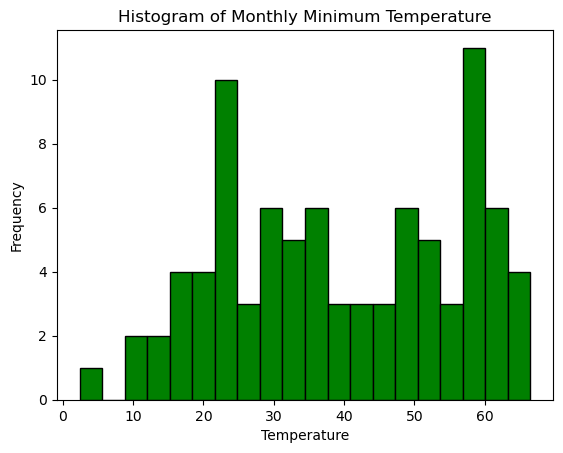

In [45]:
# Plot histogram for the target variable (e.g., MonthlyMinimumTemperature)
plt.hist(df1_ml[target], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Monthly Minimum Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


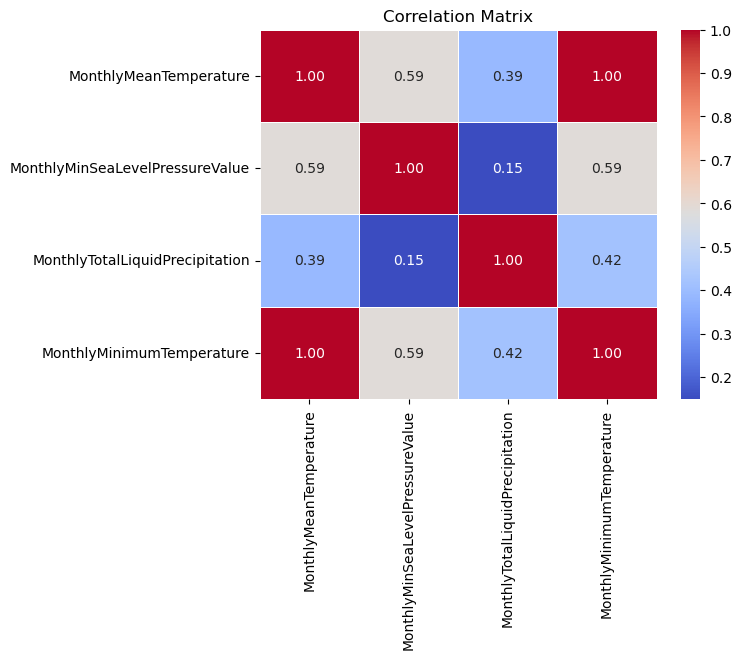

In [46]:
# Plot correlation matrix
correlation_matrix = df1_ml[features + [target]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.6)
plt.title('Correlation Matrix')
plt.show()


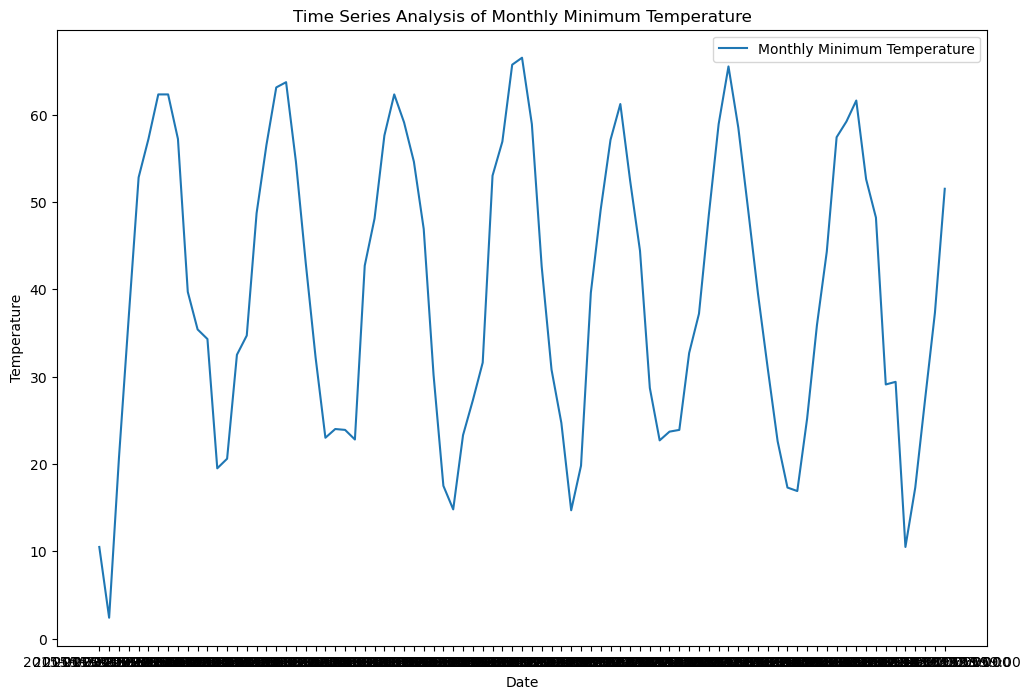

In [47]:
# Assuming 'DATE' column is in datetime format
df1_time_series = df1.set_index('DATE')

# Plot time series of MonthlyMinimumTemperature
plt.figure(figsize=(12, 8))
plt.plot(df1_time_series.index, df1_time_series['MonthlyMinimumTemperature'], label='Monthly Minimum Temperature')
plt.title('Time Series Analysis of Monthly Minimum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

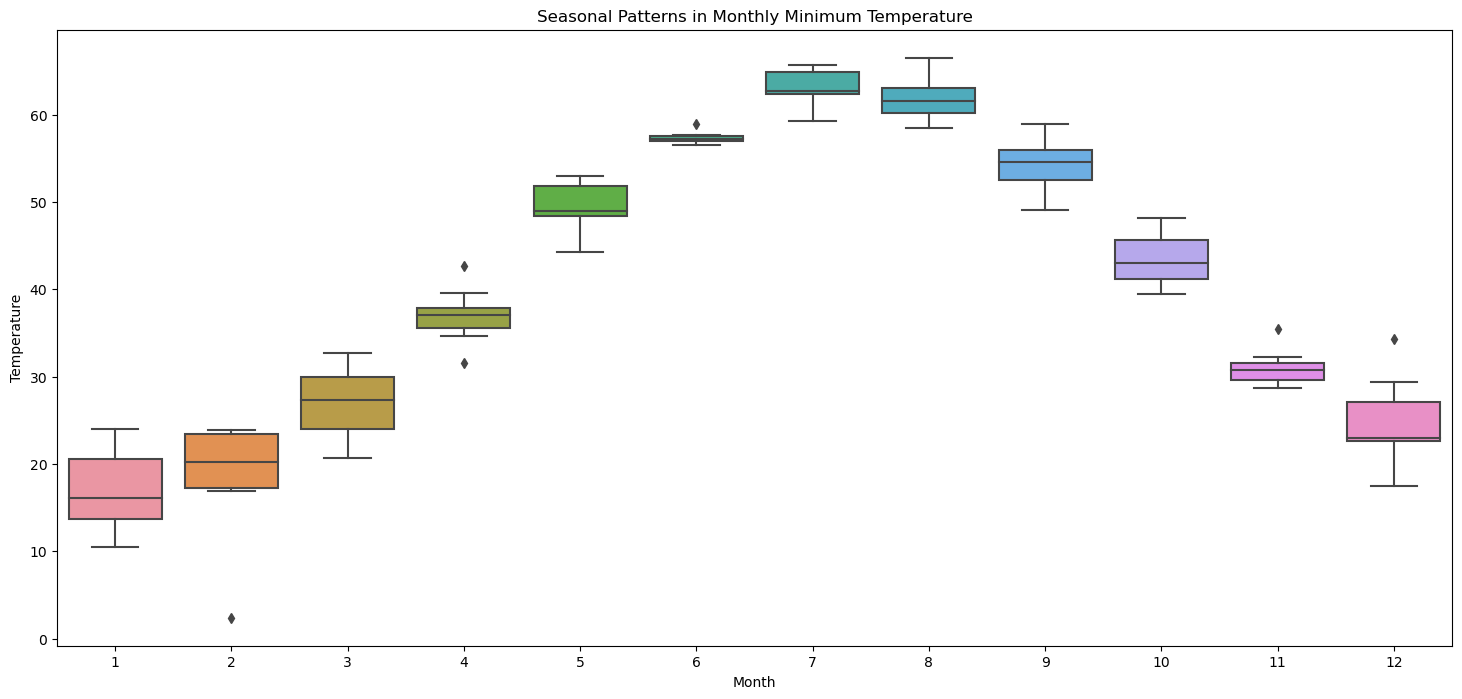

In [48]:
# Assuming 'DATE' column is in datetime format
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Extract year and month from the date
df1['Year'] = df1['DATE'].dt.year
df1['Month'] = df1['DATE'].dt.month

# Plot seasonal patterns
plt.figure(figsize=(18, 8))
sns.boxplot(x='Month', y='MonthlyMinimumTemperature', data=df1)
plt.title('Seasonal Patterns in Monthly Minimum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

In [49]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
STATION                                         0
DATE                                            0
REPORT_TYPE                                     0
SOURCE                                          0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
DailyAverageDewPointTemperature                 0
DailyAverageDryBulbTemperature                  0
DailyAverageRelativeHumidity                    0
DailyAverageSeaLevelPressure                    0
DailyAverageStationPressure                     0
DailyAverageWetBulbTemperature                  0
DailyAverageWindSpeed                           0
DailyCoolingDegreeDays                          0
DailyDepartureFromNormalAverageTemperature      0
DailyHeatingDegreeDays            

In [50]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std                         

In [51]:
# Summary statistics
summary_stats = df1.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
            STATION  SOURCE       AWND  BackupElevation  BackupLatitude  \
count  8.700000e+01    87.0  87.000000             87.0       87.000000   
mean   7.251801e+10     6.0   7.596552            260.0       42.689729   
std    0.000000e+00     0.0   1.458930              0.0        0.004227   
min    7.251801e+10     6.0   4.700000            260.0       42.681200   
25%    7.251801e+10     6.0   6.500000            260.0       42.691800   
50%    7.251801e+10     6.0   7.400000            260.0       42.691800   
75%    7.251801e+10     6.0   8.700000            260.0       42.691800   
max    7.251801e+10     6.0  10.700000            260.0       42.691800   

       BackupLongitude         CDSD        CLDD       DSNW         HDSD  ...  \
count        87.000000    87.000000   87.000000  87.000000    87.000000  ...   
mean        -73.828239   362.954023   60.252874   1.149425  3129.402299  ...   
std           0.005819   367.436180   92.905706   1.660266  2504

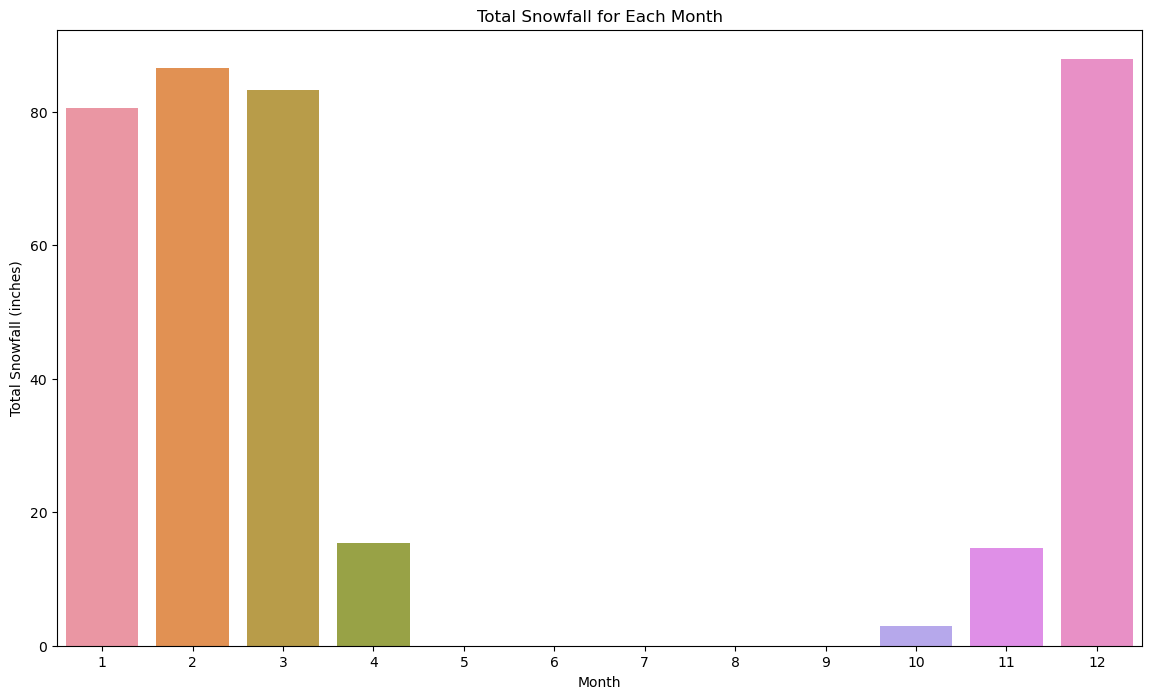

In [52]:
monthly_snowfall = df.groupby(df['DATE'].dt.month)['DailySnowfall'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='DATE', y='DailySnowfall', data=monthly_snowfall)
plt.title('Total Snowfall for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Snowfall (inches)')
plt.show()

In [53]:
df2=pd.read_csv("hourly_data.csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_9936\3401567101.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("hourly_data.csv")


In [55]:
print(df2)

           STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0      72518014735  2015-01-01T00:51:00       FM-15       7         PRECIP   
1      72518014735  2015-01-01T01:51:00       FM-15       7         PRECIP   
2      72518014735  2015-01-01T02:51:00       FM-15       7         PRECIP   
3      72518014735  2015-01-01T03:51:00       FM-15       7         PRECIP   
4      72518014735  2015-01-01T04:51:00       FM-15       7         PRECIP   
...            ...                  ...         ...     ...            ...   
64724  72518014735  2022-05-31T19:51:00       FM-15       7         PRECIP   
64725  72518014735  2022-05-31T20:51:00       FM-15       7         PRECIP   
64726  72518014735  2022-05-31T21:51:00       FM-15       7         PRECIP   
64727  72518014735  2022-05-31T22:51:00       FM-15       7         PRECIP   
64728  72518014735  2022-05-31T23:51:00       FM-15       7         PRECIP   

       BackupElevation BackupEquipment  BackupLatitude  BackupL

In [58]:
df3=pd.read_csv("three_hour_data.csv")

In [59]:
print(df3)

           STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0      72518014735  2015-01-01T01:00:00       FM-12       4         PRECIP   
1      72518014735  2015-01-01T04:00:00       FM-12       4         PRECIP   
2      72518014735  2015-01-01T07:00:00       FM-12       4         PRECIP   
3      72518014735  2015-01-01T10:00:00       FM-12       4         PRECIP   
4      72518014735  2015-01-01T13:00:00       FM-12       4         PRECIP   
...            ...                  ...         ...     ...            ...   
20838  72518014735  2022-05-31T10:00:00       FM-12       4         PRECIP   
20839  72518014735  2022-05-31T13:00:00       FM-12       4         PRECIP   
20840  72518014735  2022-05-31T16:00:00       FM-12       4         PRECIP   
20841  72518014735  2022-05-31T19:00:00       FM-12       4         PRECIP   
20842  72518014735  2022-05-31T22:00:00       FM-12       4         PRECIP   

       BackupElevation BackupEquipment  BackupLatitude  BackupL

In [60]:
# Identify common columns among datasets
common_columns = set(df.columns) & set(df1.columns) & set(df2.columns) & set(df3.columns)

# Print common columns
print("Common columns:", common_columns)


Common columns: {'BackupElevation', 'DATE', 'REPORT_TYPE', 'STATION', 'SOURCE', 'BackupLatitude', 'WindEquipmentChangeDate', 'BackupName', 'BackupLongitude', 'BackupEquipment', 'BackupElements'}


In [61]:
# Load the datasets from Kaggle paths
df = pd.read_csv('daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
df2 = pd.read_csv('hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
df1 = pd.read_csv('monthly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
df3 = pd.read_csv('three_hour_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
# Merge the datasets based on 'DATE' with different suffixes
merged_data = pd.merge(df, df2, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, df1, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, df3, on='DATE', how='outer', suffixes=('_merged', '_three_hour'))
# Display the merged dataset
print("Merged Dataset:")
print(merged_data.head())
# Identify columns with mixed types in hourly_data
mixed_type_columns = df2.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)
# Print data types of those columns
print("Data types of columns with mixed types:")
print(df2[mixed_type_columns].dtypes)

C:\Users\HP\AppData\Local\Temp\ipykernel_9936\1209783114.py:3: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


Merged Dataset:
   STATION_daily                DATE  REPORT_TYPE_daily  SOURCE_daily  \
0   7.251801e+10 2015-01-01 23:59:00                NaN           6.0   
1   7.251801e+10 2015-01-02 23:59:00                NaN           6.0   
2   7.251801e+10 2015-01-03 23:59:00                NaN           6.0   
3   7.251801e+10 2015-01-04 23:59:00                NaN           6.0   
4   7.251801e+10 2015-01-05 23:59:00                NaN           6.0   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                  260.0               PLASTIC   
1                   NaN                  260.0               PLASTIC   
2                   NaN                  260.0               PLASTIC   
3                   NaN                  260.0               PLASTIC   
4                   NaN                  260.0               PLASTIC   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0               42.6918              -73

In [62]:
# Identify columns with mixed types in hourly_data
mixed_type_columns = df2.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)

# Print data types of those columns
print("Data types of columns with mixed types:")
print(df2[mixed_type_columns].dtypes)


Columns with mixed types in hourly_data: Index(['HourlyDewPointTemperature', 'HourlyDryBulbTemperature'], dtype='object')
Data types of columns with mixed types:
HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


In [63]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
STATION_daily                          85575
DATE                                       0
REPORT_TYPE_daily                      88243
SOURCE_daily                           85575
BackupElements_daily                   88243
                                       ...  
HourlyVisibility_three_hour            67400
HourlyWetBulbTemperature_three_hour    67400
HourlyWindDirection_three_hour         67400
HourlyWindSpeed_three_hour             67400
WindEquipmentChangeDate_three_hour     67400
Length: 119, dtype: int64


In [64]:
# Summary statistics
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
       STATION_daily  REPORT_TYPE_daily  SOURCE_daily  BackupElements_daily  \
count   2.668000e+03                0.0        2668.0                   0.0   
mean    7.251801e+10                NaN           6.0                   NaN   
std     0.000000e+00                NaN           0.0                   NaN   
min     7.251801e+10                NaN           6.0                   NaN   
25%     7.251801e+10                NaN           6.0                   NaN   
50%     7.251801e+10                NaN           6.0                   NaN   
75%     7.251801e+10                NaN           6.0                   NaN   
max     7.251801e+10                NaN           6.0                   NaN   

       BackupElevation_daily  BackupLatitude_daily  BackupLongitude_daily  \
count                 2668.0           2668.000000            2668.000000   
mean                   260.0             42.689750             -73.828268   
std                      0.0         

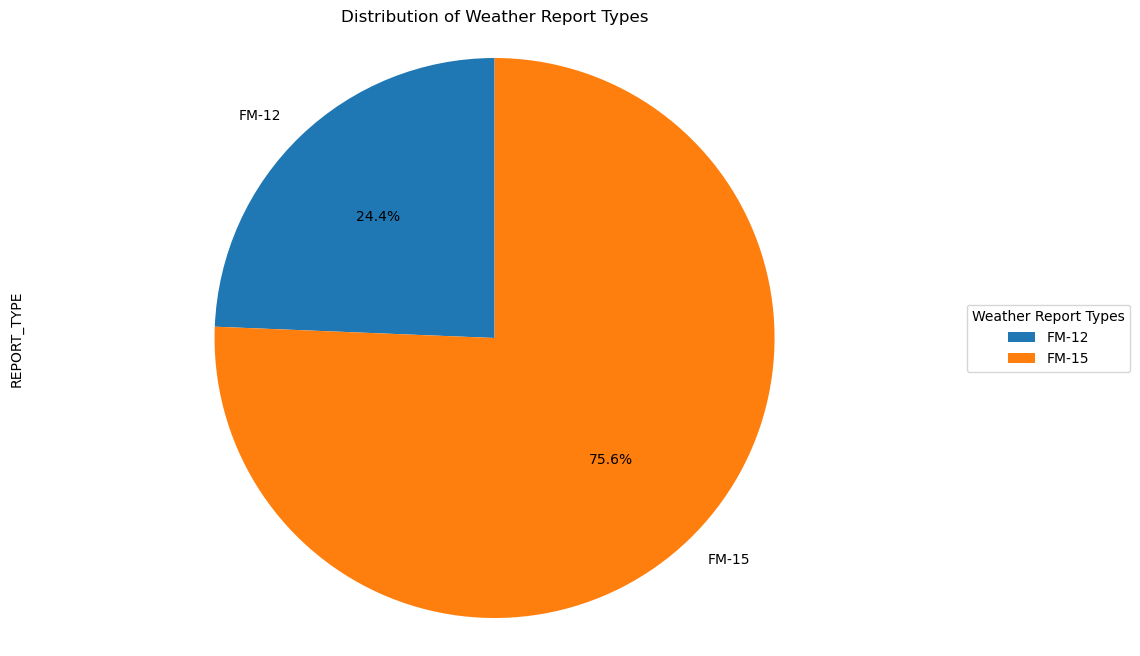

In [65]:
# Assuming daily_data, hourly_data, and three_hour_data are your DataFrames
# Replace 'REPORT_TYPE' with the actual column name in your datasets
report_types_daily = df['REPORT_TYPE'].value_counts()
report_types_hourly = df2['REPORT_TYPE'].value_counts()
report_types_three_hour = df3['REPORT_TYPE'].value_counts()

# Combine counts from all datasets
combined_report_types = report_types_daily.add(report_types_hourly, fill_value=0)
combined_report_types = combined_report_types.add(report_types_three_hour, fill_value=0)

# Plot the pie chart with previous colors
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors  # Using tab10 colormap for consistent colors
combined_report_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Add a legend
plt.legend(combined_report_types.index, title='Weather Report Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Weather Report Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()